[View in Colaboratory](https://colab.research.google.com/github/ameasure/try_git/blob/master/NNet%20Demo.ipynb)

In [2]:
import tensorflow
import keras

Using TensorFlow backend.


In [3]:
!pip install tables

    100% |████████████████████████████████| 3.8MB 943kB/s 
    100% |████████████████████████████████| 163kB 23.5MB/s 


In [4]:
tensorflow.__version__

'1.11.0-rc1'

In [5]:
keras.__version__

'2.1.6'

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam

import pandas as pd

# read in our training data
df_train = pd.read_hdf('msha_2010-2011.h5')
# read in our validation data
df_valid = pd.read_hdf('msha_2012.h5')

# create bag of words features
vectorizer = CountVectorizer()
vectorizer.fit(df_train['NARRATIVE'])
X_train = vectorizer.transform(df_train['NARRATIVE'])
X_valid = vectorizer.transform(df_valid['NARRATIVE'])

# keras only accepts a one-hot encoding of the training labels
# we do that here
label_encoder = LabelBinarizer().fit(df_train['INJ_BODY_PART'])
y_train = label_encoder.transform(df_train['INJ_BODY_PART'])
y_valid = label_encoder.transform(df_valid['INJ_BODY_PART'])

# specify the shape of our model, specifically the number of
# features will be equal to however many features are created by our
# vectorizer (i.e. X_train.shape[1])
text_input = Input(shape=(X_train.shape[1],))
# the first layer will take as input our raw features
# it will consist of 100 artificial neurons, each with a relu activation
layer1 = Dense(units=100, activation='relu')(text_input)
# the next layer will take as input the outputs from layer 1
# it will produce a softmax output for the number of classes
output = Dense(units=len(label_encoder.classes_), activation='softmax')(layer1)
# specify the inputs and outputs of our model
# input is the raw text features
# output is the predicted probabilities
model = Model(inputs=[text_input], outputs=[output])
# specify the algorithm for calculating weights 'adam'
# specify the loss function 'categorical_crossentropy'
# specify the validation metrics we will calculate after each epoch
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 11915)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1191600   
_________________________________________________________________
dense_2 (Dense)              (None, 46)                4646      
Total params: 1,196,246
Trainable params: 1,196,246
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_valid, y_valid),
          batch_size=32, epochs=5)

Train on 18681 samples, validate on 9032 samples
Epoch 1/5
18681/18681 [==============================] - 8s 414us/step - loss: 1.6679 - acc: 0.6208 - val_loss: 1.0060 - val_acc: 0.7580
Epoch 2/5
18681/18681 [==============================] - 7s 350us/step - loss: 0.7112 - acc: 0.8266 - val_loss: 0.8859 - val_acc: 0.7726
Epoch 3/5
18681/18681 [==============================] - 7s 351us/step - loss: 0.4338 - acc: 0.8912 - val_loss: 0.8928 - val_acc: 0.7658
Epoch 4/5
18681/18681 [==============================] - 7s 351us/step - loss: 0.2879 - acc: 0.9314 - val_loss: 0.9296 - val_acc: 0.7620
Epoch 5/5
18681/18681 [==============================] - 7s 350us/step - loss: 0.1987 - acc: 0.9545 - val_loss: 1.0207 - val_acc: 0.7480


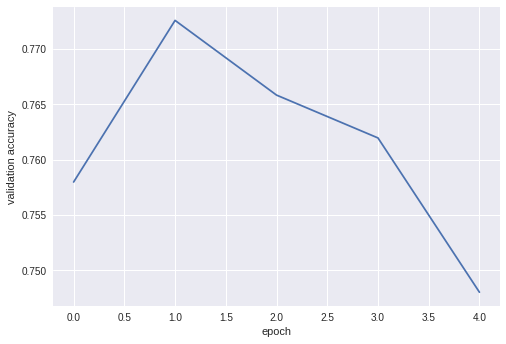

In [9]:
from matplotlib import pyplot as plt

plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.plot(model.history.history['val_acc'])